# Credit Card Fraud Prediction Model

### Premise
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

### Summary
This is a very interesting exercise, specialy because we have no idea what the features may be so there is no real business knowledge we can apply on them. To make things worse, there is an extreme difference between the number of "Fraud" cases and "No Fraud" as we will see later.

To begin the problem, we know that the dataset we are dealing with is unbalance. Just for fun we will show how different our correlation heatmap can be if we are using the whole dataset and not an undersampled version. After properly understanding the relation between the varaibles we proceed to delete those features that share a high correlation with each others since having them both will not bring value to our model. From the resulting group of features we select those who have a decent correlation with our target class. As our final step a logistic regression model was created and its performance reviewed.

Link to Kaggle: https://www.kaggle.com/mlg-ulb/creditcardfraud

# Table of Contents

1. [Heatmap Analysis](#ha)
2. [Undersampling Data](#ud)
3. [Heatmap Analysis with Undersampled Data](#haud)
4. [Removing Redundant Features](#rrf)
5. [Boxplot Analysis](#ba)
6. [Feature Selection](#fs)
7. [Distribution Analysis](#da)
8. [Oversamping Data with SMOTE](#od)
9. [Model creation](#mc)
10. [Model scoring](#ms)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [552]:
df = pd.read_csv("creditcard.csv")
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [553]:
df_X = df.drop(['Class'], axis=1)
df_y = df['Class']

Text(0, 0.5, 'Number of cases')

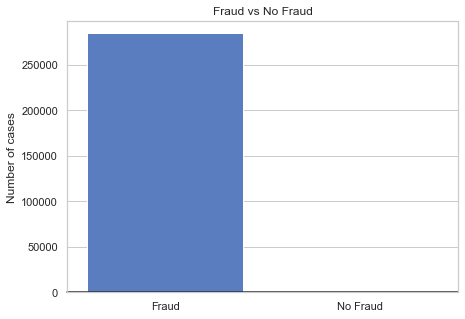

In [554]:
f, ax = plt.subplots(figsize=(7, 5))
sns.barplot(x=['Fraud', 'No Fraud'], y=df_y.value_counts().tolist(), palette="muted",ax = ax)
ax.axhline(0, color="k", clip_on=False)
ax.set_title("Fraud vs No Fraud")
ax.set_ylabel("Number of cases")

<a name="ha"></a>
## Heatmap Analysis

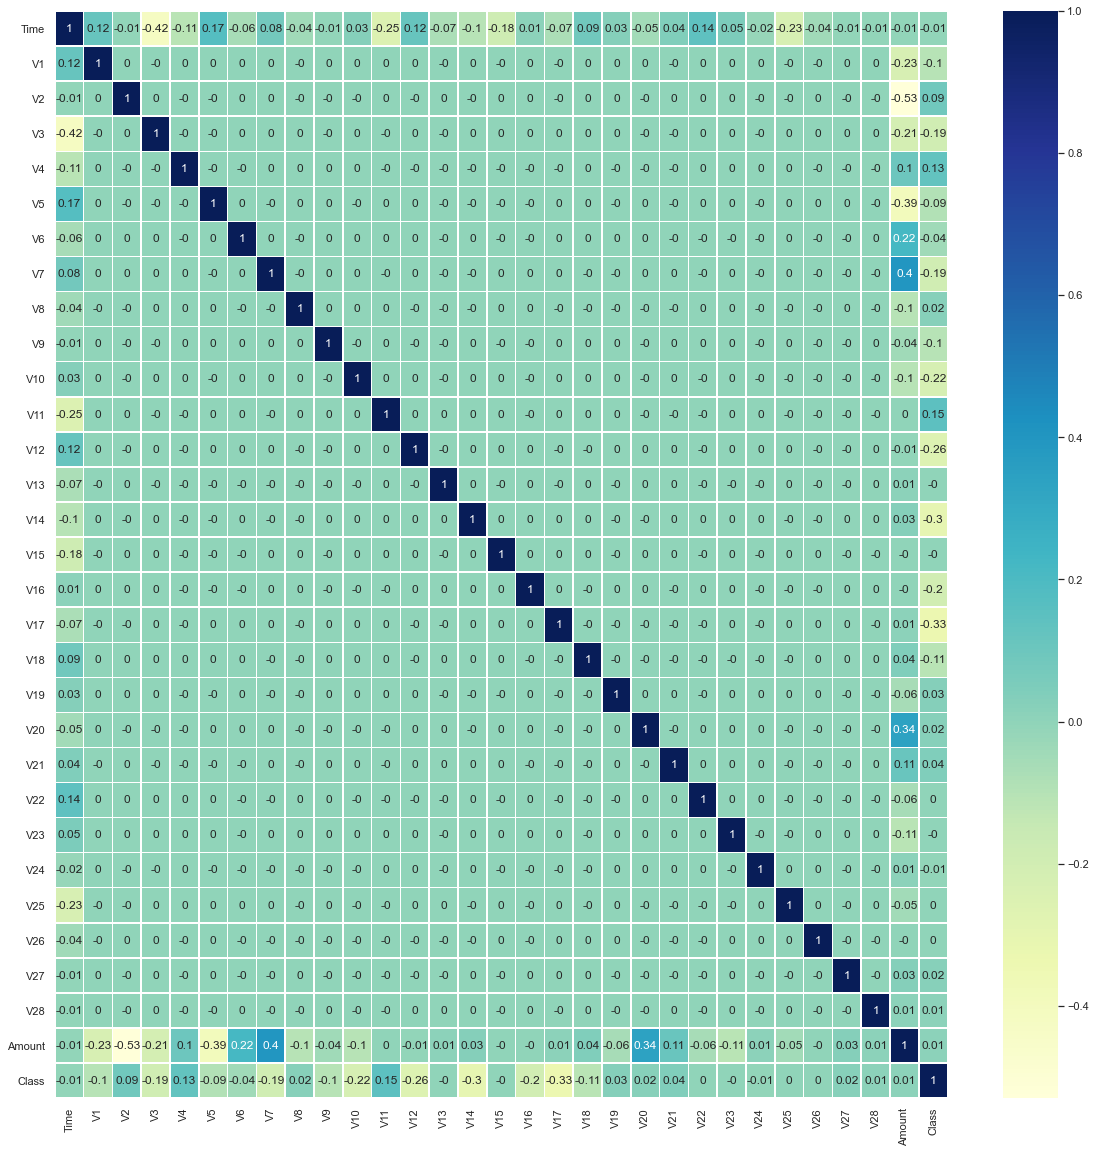

In [555]:
f, ax = plt.subplots(figsize=(20, 20))
corrs = df.corr()
corrs = corrs.applymap(lambda x : round(x, 2))
sns.heatmap(corrs, annot=True, linewidths=.5, ax=ax, cmap="YlGnBu")

<a name="ud"></a>
## Undersampling Data

In [556]:
from sklearn.datasets import make_classification
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=42)
X_und, y_und = cc.fit_resample(df_X, df_y)
print('Resampled dataset shape %s' % X_und.shape[0])

Resampled dataset shape 984


Text(0, 0.5, 'Number of cases')

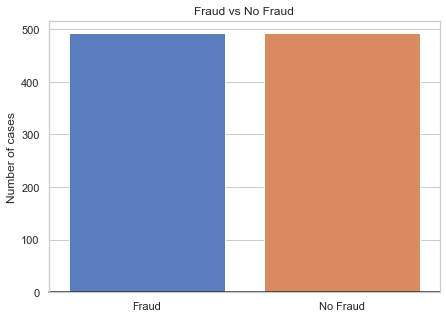

In [557]:
f, ax = plt.subplots(figsize=(7, 5))
sns.barplot(x=['Fraud', 'No Fraud'], y=y_und.value_counts().tolist(), palette="muted",ax = ax)
ax.axhline(0, color="k", clip_on=False)
ax.set_title("Fraud vs No Fraud")
ax.set_ylabel("Number of cases")

<a name="haud"></a>
## Heatmap Analysis with Undersampled Data

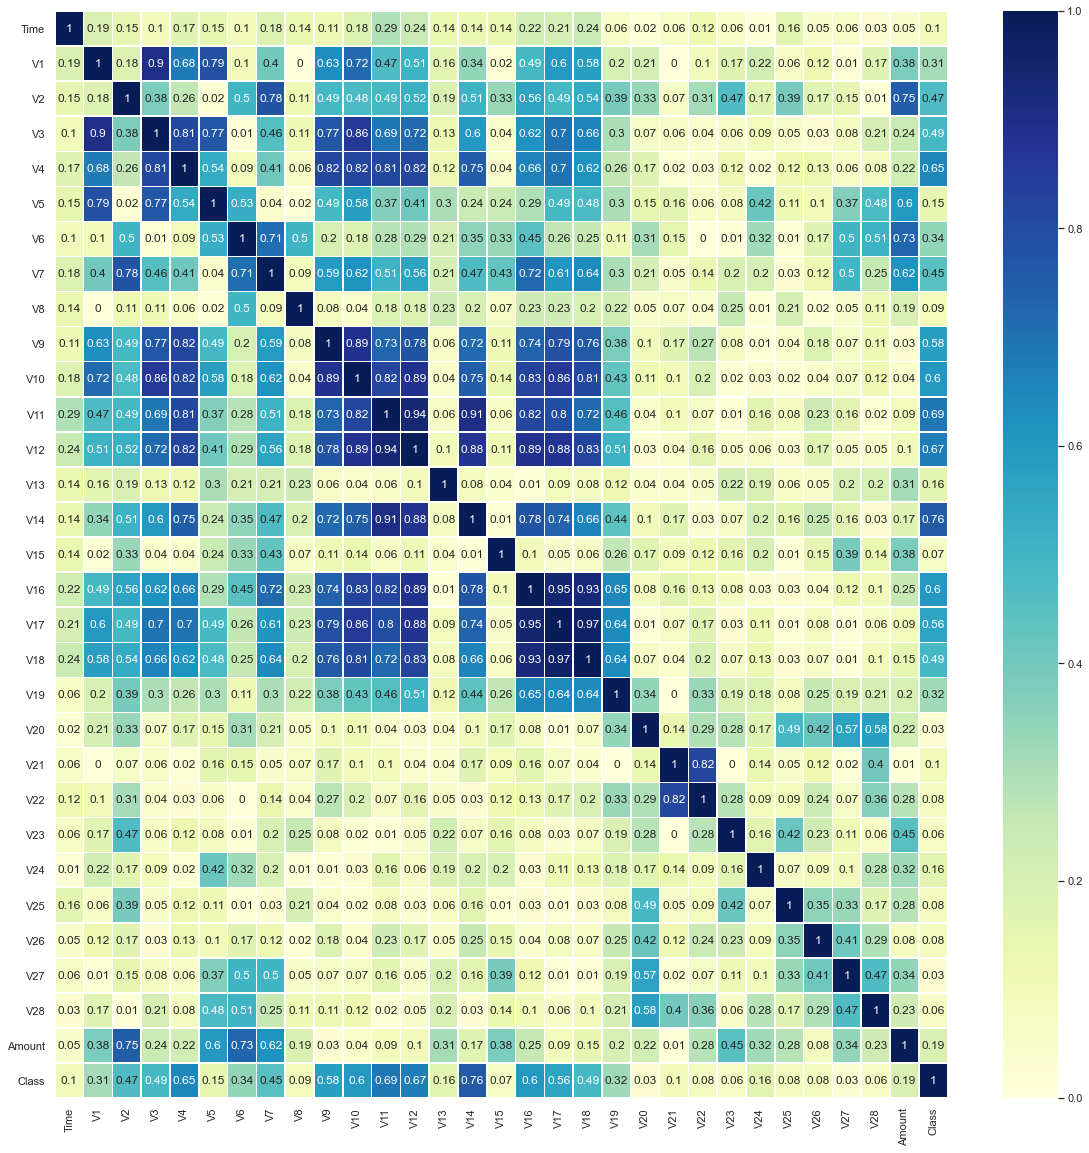

In [558]:
f, ax = plt.subplots(figsize=(20, 20))
corrs = (X_und.join(y_und)).corr()
corrs = corrs.applymap(lambda x : abs(round(x, 2)))
sns.heatmap(corrs, annot=True, linewidths=.5, ax=ax, cmap="YlGnBu")

<a name="rrf"></a>
## Removing Redundant Features

As seen in the heatmap, there are certain variable that overlap at the point that they share almost 95% correlation. It was decided that from those features that hold 85%+ correlation would be removed since they do not provide much value.

In [559]:
features = X_und.columns.tolist()
to_remove = []

for i in range(len(features)-1):
    for j in range(i, len(features)):
        if i != j and corrs[features[i]][features[j]] >= 0.85:
            print(cols[i], " -> ", features[j], " = ", corrs[features[i]][j])
            to_remove.append(features[i])
            break
for i in to_remove:
    features.remove(i)

V2  ->  V3  =  0.9
V5  ->  V10  =  0.86
V15  ->  V10  =  0.89
V18  ->  V12  =  0.89
V19  ->  V12  =  0.94
V20  ->  V14  =  0.88
V24  ->  V17  =  0.95
V25  ->  V18  =  0.97


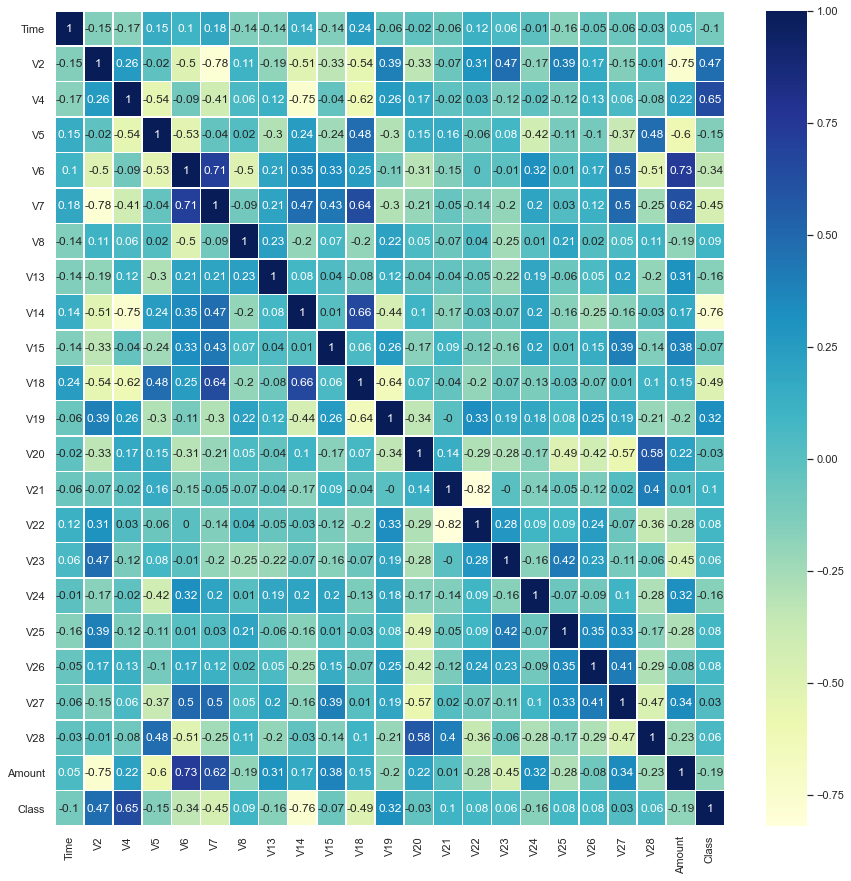

In [560]:
f, ax = plt.subplots(figsize=(15, 15))
corrs = (X_und[cols].join(y_und)).corr()
corrs = corrs.applymap(lambda x : round(x, 2))
sns.heatmap(corrs, annot=True, linewidths=.5, ax=ax, cmap="YlGnBu")

<a name="ba"></a>
## Boxplot Analysis

We are using boxplots to further understand the statistic values of our features. As seen below, when using the raw data there is a huge number of outliers that might affect the training of our model. After removing outliers using the IQR our data is much more usable. We have to remember to be careful to not removed to many instances of the minority class in order to safeguard enough information for our model.

### Boxplots with raw data

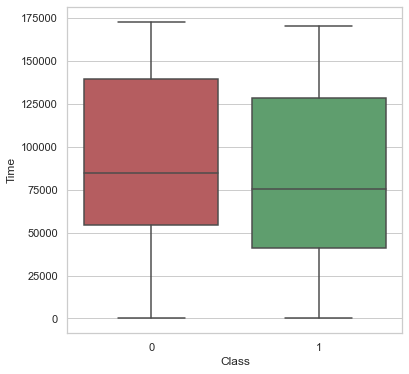

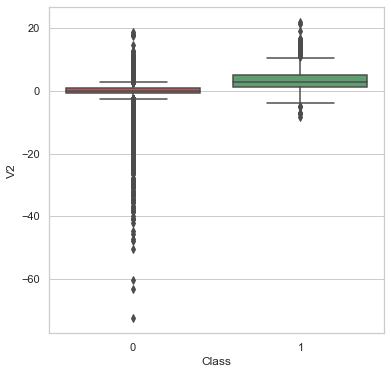

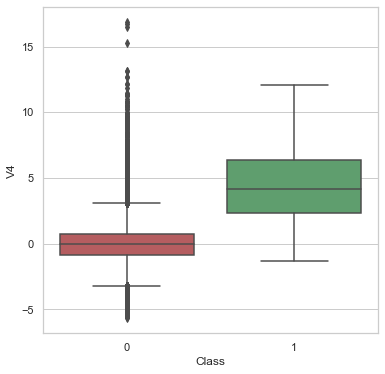

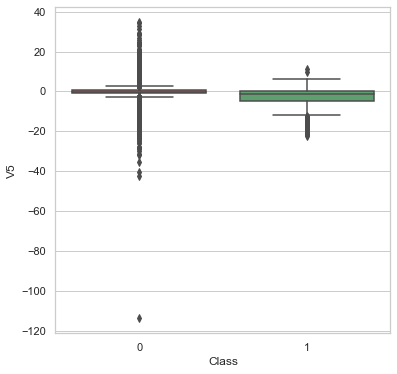

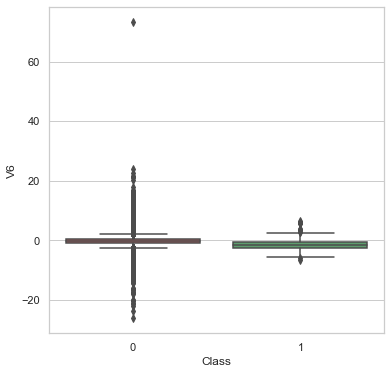

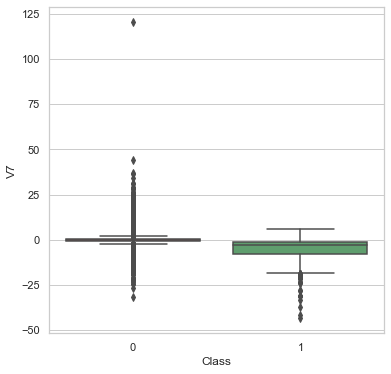

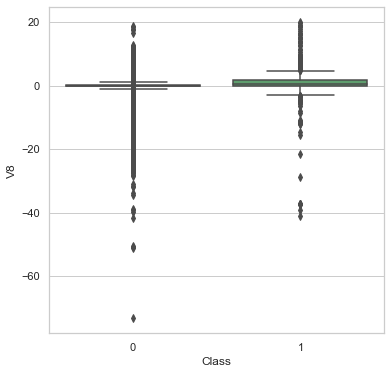

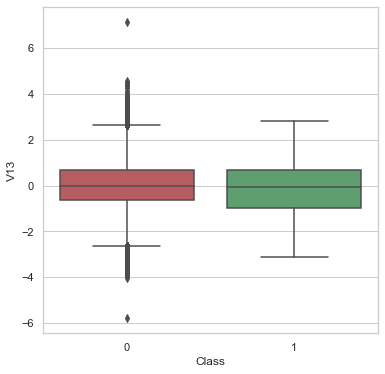

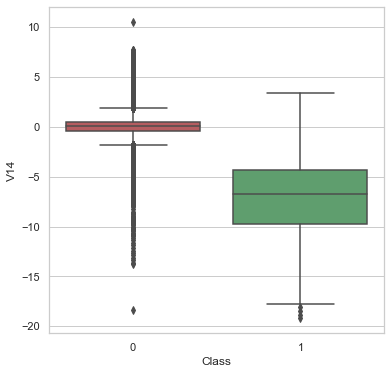

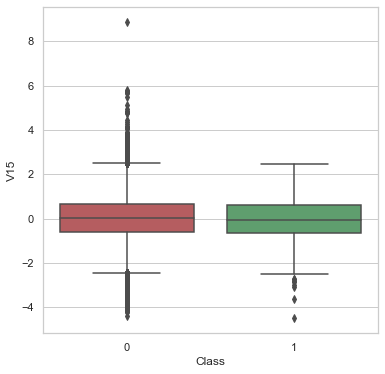

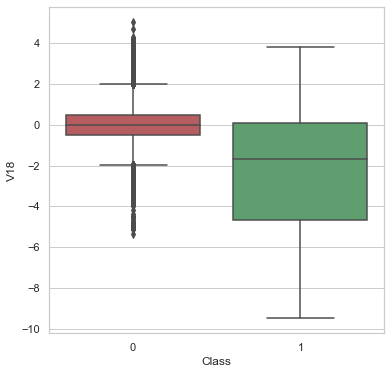

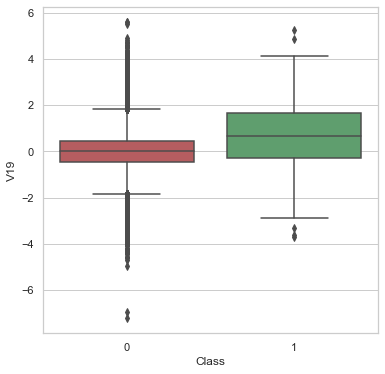

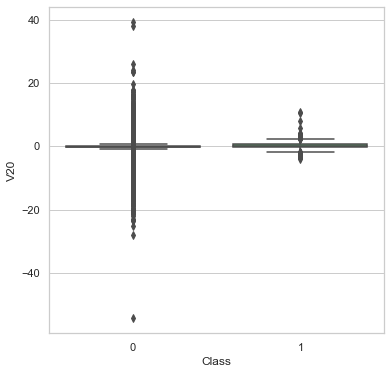

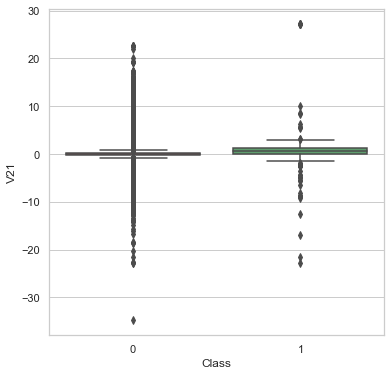

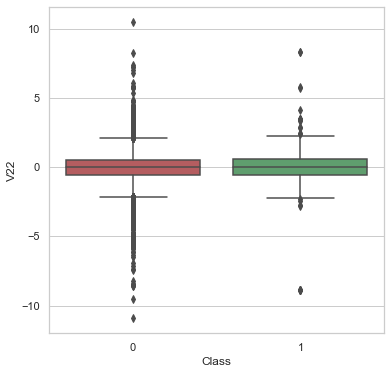

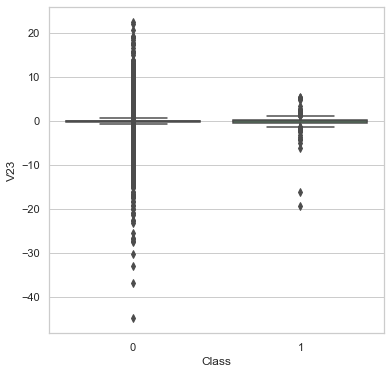

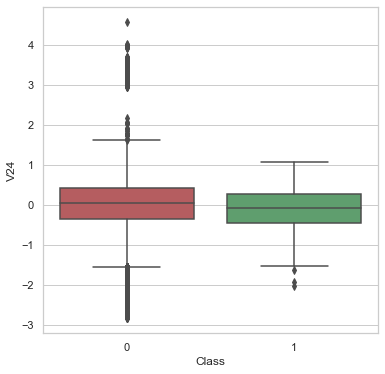

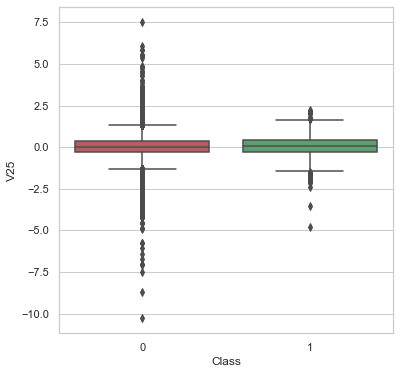

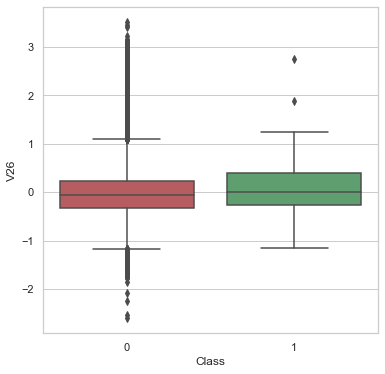

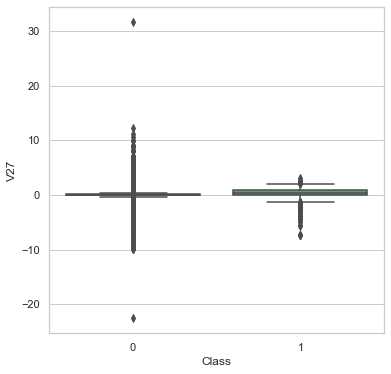

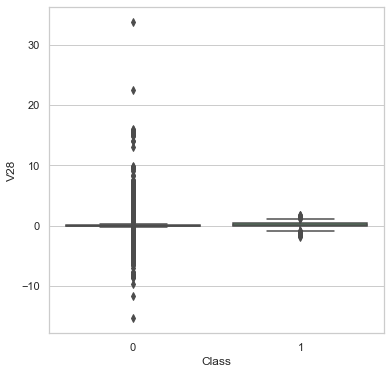

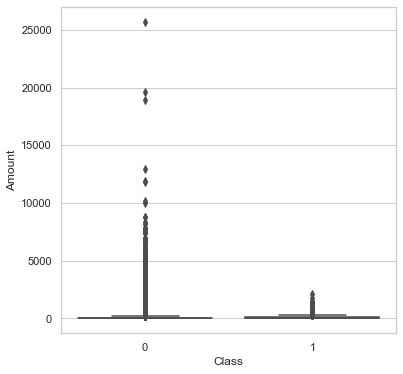

In [520]:
sns.set(style="whitegrid")

for fea in features:
    
    f, ax = plt.subplots(figsize=(6,6))
    sns.boxplot(x="Class", y=fea, palette=["r", "g"],
                data=df, ax=ax)
    plt.show()

### Boxplots after outlier removal

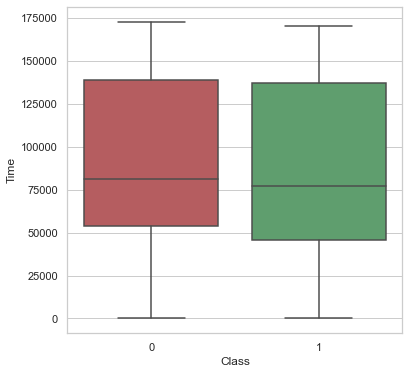

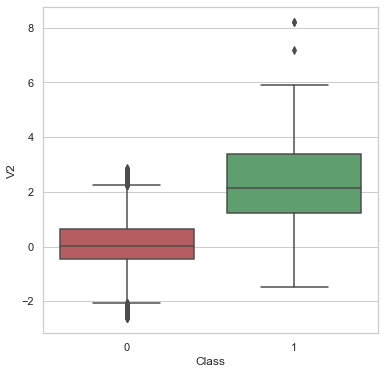

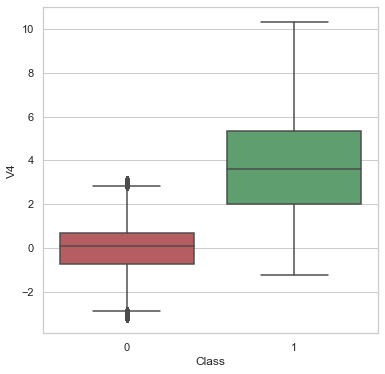

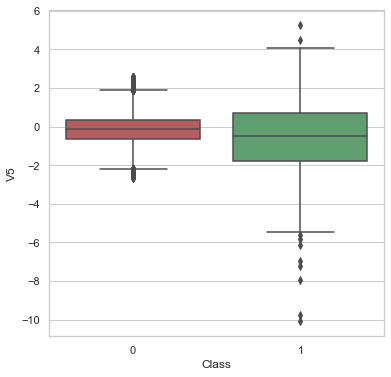

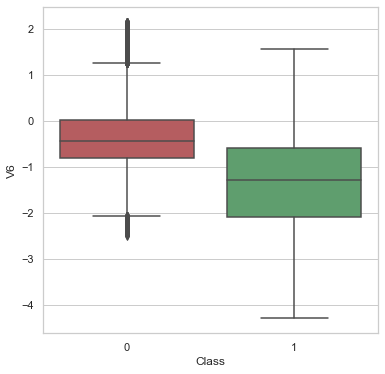

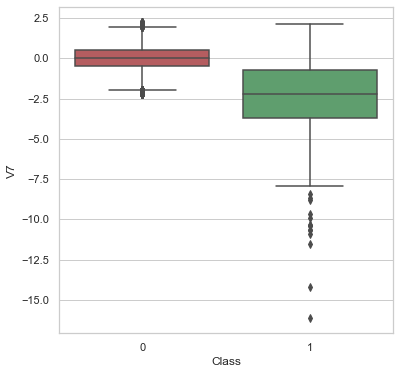

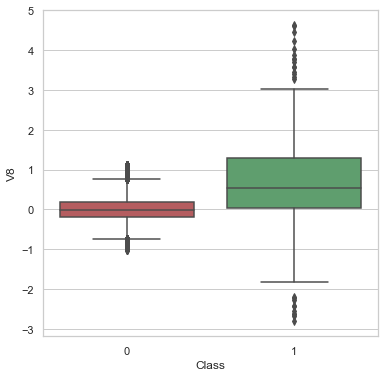

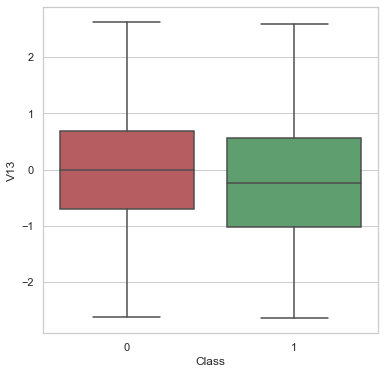

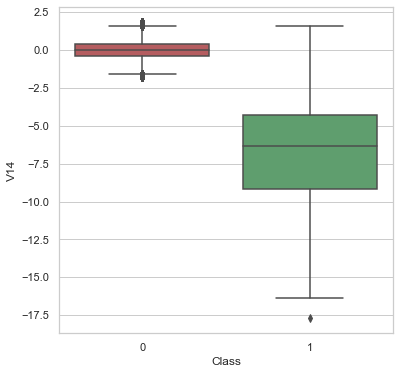

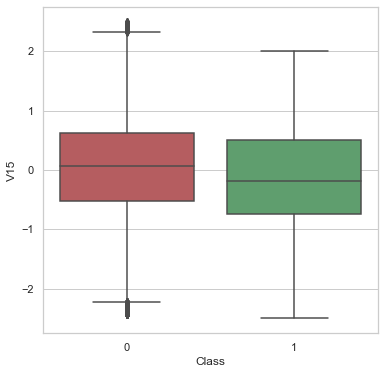

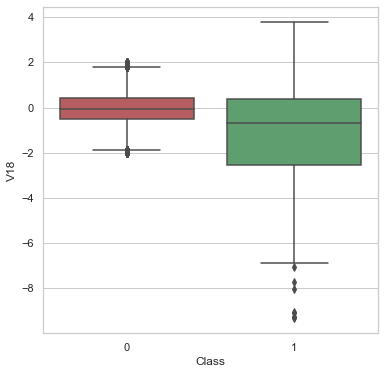

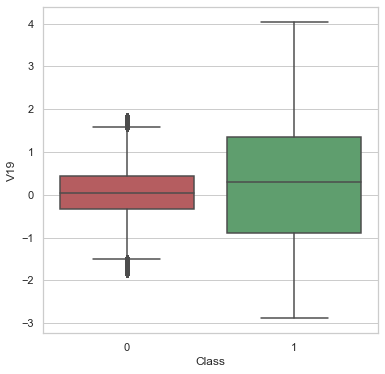

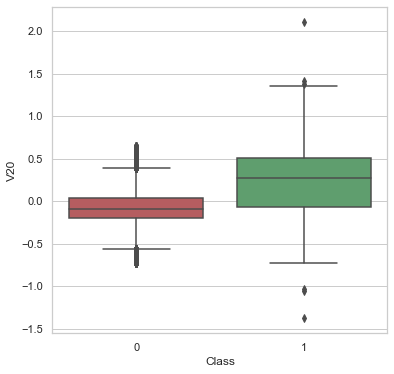

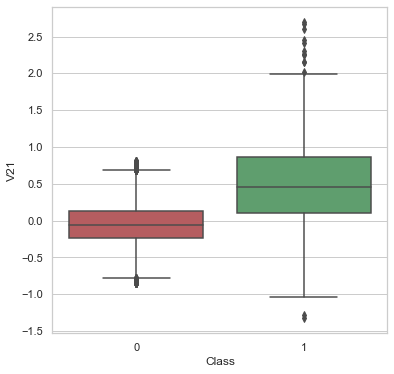

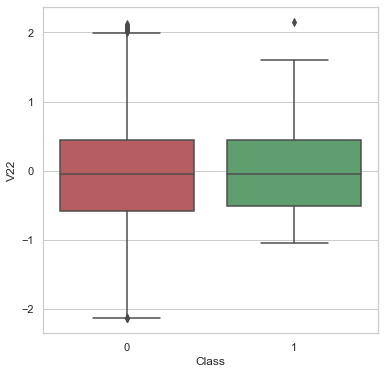

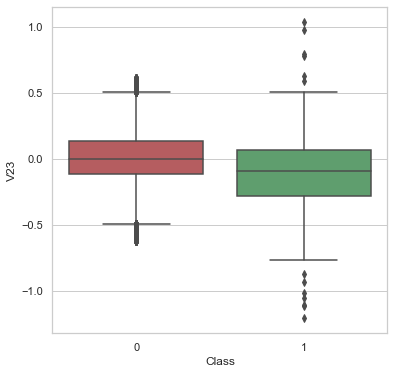

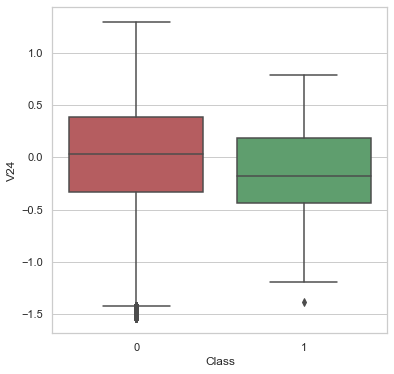

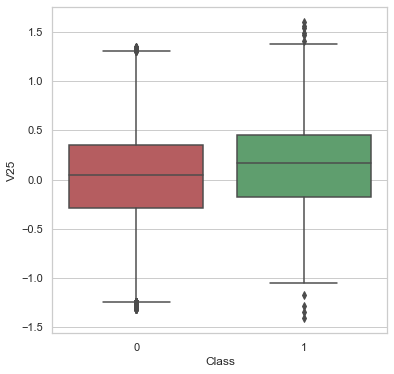

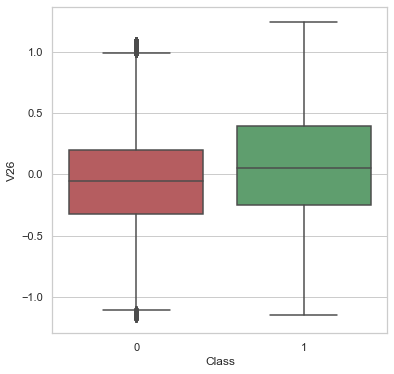

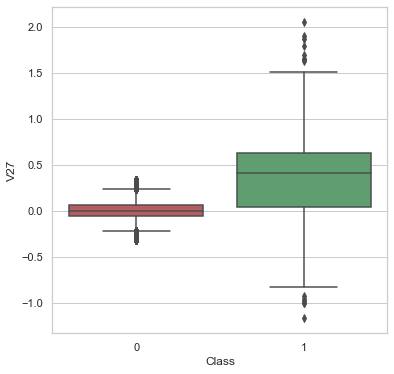

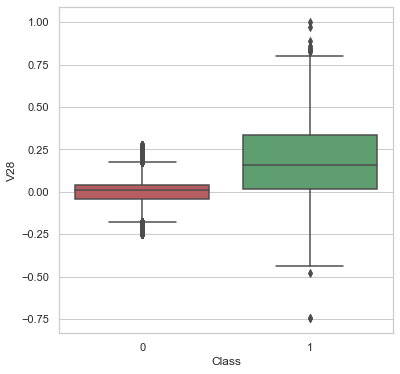

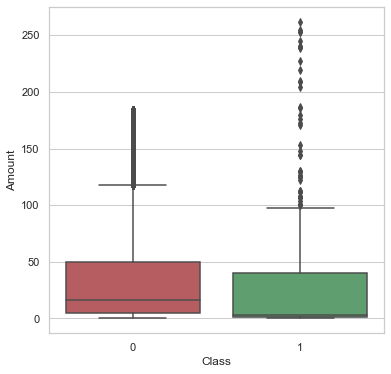

In [635]:
new_df = df

outlier_limit = 1.5

for fea in features:
    plotData = df[[fea, 'Class']]
    
    nofraud = plotData[plotData['Class'] == 0]
    nofraud_q1 = nofraud[fea].quantile(0.25)
    nofraud_q3 = nofraud[fea].quantile(0.75)
    nofraud_iqr = nofraud_q3 - nofraud_q1
    nofraud_il = nofraud_q1 - outlier_limit * nofraud_iqr
    nofraud_ml = nofraud_q3 + outlier_limit * nofraud_iqr
    
    fraud = plotData[plotData['Class'] == 1]
    fraud_q1 = fraud[fea].quantile(0.25)
    fraud_q3 = fraud[fea].quantile(0.75)
    fraud_iqr = fraud_q3 - fraud_q1
    fraud_il = fraud_q1 - 1.5 * fraud_iqr
    fraud_ml = fraud_q3 + 1.5 * fraud_iqr
    plotData = plotData.loc[((plotData[fea] >= nofraud_il) & (plotData[fea] <= nofraud_ml) & (plotData['Class'] == 0)) |
                           ((plotData[fea] >= fraud_il) & (plotData[fea] <= fraud_ml) & (plotData['Class'] == 1))]
    
    bad_df = df.index.isin(plotData.index.tolist())
    new_df = new_df.drop(df[~bad_df].index.tolist(), errors="ignore")

for fea in features:
    f, ax = plt.subplots(figsize=(6,6))
    sns.boxplot(x="Class", y=fea, palette=["r", "g"],
                data=new_df, ax=ax)
    plt.show()
    
    

In [636]:
df_X = new_df.drop(['Class'], axis=1)
df_y = new_df['Class']

<a name="fs"></a>
## Feature Selection

For the feature selection we based the desicion based on both the boxplots and the correlation matrix. Both sources provide similar insight and show that there is a conection between our features and our class and thos chosen have no extreme overlap on values. Our selected features are V2, V4, V6, V7, V14, V18

<a name="da"></a>
## Distribution Analysis

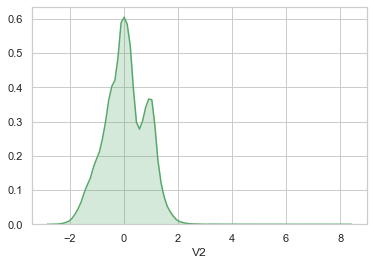

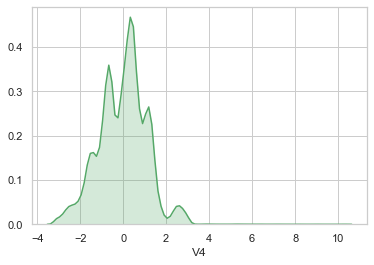

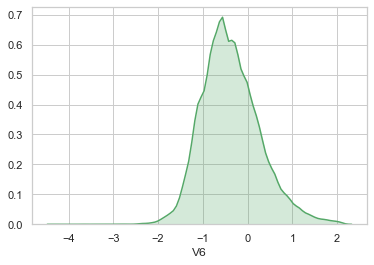

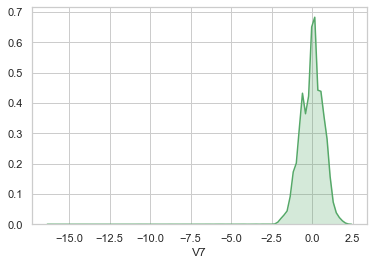

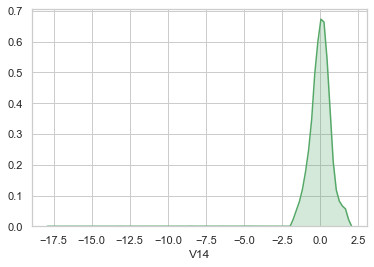

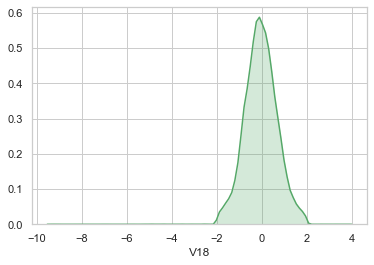

In [638]:
final_features = ['V2', 'V4', 'V6', 'V7', 'V14', 'V18']
for i in final_features:
    sns.distplot(df_X[i], hist=False, color="g", kde_kws={"shade": True})
    plt.show()

<a name="od"></a>
## Oversamping Data with SMOTE

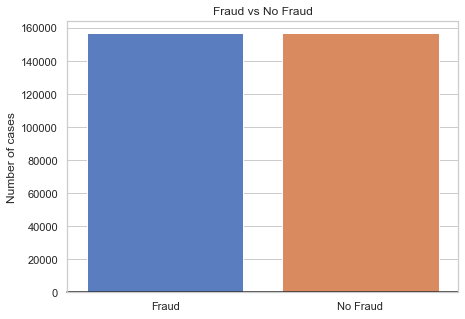

In [639]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_smote, y_smote = sm.fit_resample(df_X[final_features], df_y)
f, ax = plt.subplots(figsize=(7, 5))
sns.barplot(x=['Fraud', 'No Fraud'], y=y_smote.value_counts().tolist(), palette="muted",ax = ax)
ax.axhline(0, color="k", clip_on=False)
ax.set_title("Fraud vs No Fraud")
ax.set_ylabel("Number of cases")

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_smote, y_smote, test_size=0.30, random_state=42)

<a name="mc"></a>
## Model creation

In [641]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, y_train)

y_result = clf.predict(X_test)

<a name="ms"></a>
## Model scoring

As seen below in the confusion matrix and the PR-Curve, our model hold a good performance overall so we can be satisfied with our model. Just a reminder PR-Curve can be use in cases like this where our dataset is not balance.

0.9425490333829362
0.7729668661737412
Confusion matrix
[[45414  1521]
 [ 3870 43142]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     46935
           1       0.97      0.92      0.94     47012

    accuracy                           0.94     93947
   macro avg       0.94      0.94      0.94     93947
weighted avg       0.94      0.94      0.94     93947

Average precision-recall score: 0.99


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.99')

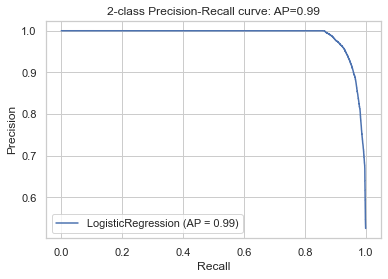

In [642]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

print(clf.score(X_smote, y_smote))
print(explained_variance_score(y_test, y_result))

print('Confusion matrix')
print(confusion_matrix(y_test, y_result))

print(classification_report(y_test, y_result))

y_score = clf.decision_function(X_test)

from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(clf, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))